In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('D:/accident_severity_analytics/data/processed/Cleaning_Crashes_Data.csv')
df

crash date           crash time    borough   latitude  longitude  \
60       2022-04-24  1900-01-01 15:21:00     Queens  40.745235 -73.937706   
64       2022-04-07  1900-01-01 14:14:00  Manhattan  40.748158 -73.970330   
70       2021-12-04  1900-01-01 12:00:00   Brooklyn  40.665375 -73.934235   
72       2021-12-09  1900-01-01 23:15:00   Brooklyn  40.640835 -73.989670   
93       2021-12-09  1900-01-01 10:13:00   Brooklyn  40.638523 -73.926070   
...             ...                  ...        ...        ...        ...   
2076132  2024-03-25  1900-01-01 23:13:00     Queens  40.736153 -73.867550   
2076167  2024-03-23  1900-01-01 05:08:00     Queens  40.765377 -73.889060   
2076185  2024-03-25  1900-01-01 08:40:00  Manhattan  40.719970 -73.992905   
2076194  2024-03-25  1900-01-01 15:10:00     Queens  40.666862 -73.804500   
2076250  2024-03-25  1900-01-01 09:45:00   Brooklyn  40.682655 -73.910034   

               on street name   cross street name  number of persons injured  \
60             THOMSON AVENUE     SKILLMAN AVENUE                          1   
64                   1 AVENUE      EAST 41 STREET                          0   
70               CROWN STREET  SCHENECTADY AVENUE                          0   
72                  12 AVENUE           41 STREET                          1   
93              KINGS HIGHWAY       FARRAGUT ROAD                          2   
...                       ...                 ...                        ...   
2076132             57 AVENUE           94 STREET                          1   
2076167             80 STREET   ASTORIA BOULEVARD                          1   
2076185       CHRYSTIE STREET     DELANCEY STREET                          1   
2076194  NORTH CONDUIT AVENUE           134 PLACE                          2   
2076250       CHAUNCEY STREET            BROADWAY                          0   

         number of persons killed  number of pedestrians injured  ...  \
60                              0                              0  ...   
64                              0                              0  ...   
70                              0                              0  ...   
72                              0                              0  ...   
93                              0                              0  ...   
...                           ...                            ...  ...   
2076132                         0                              0  ...   
2076167                         0                              0  ...   
2076185                         0                              0  ...   
2076194                         0                              0  ...   
2076250                         0                              0  ...   

         number of cyclist injured  number of cyclist killed  \
60                               0                         0   
64                               0                         0   
70                               0                         0   
72                               1                         0   
93                               0                         0   
...                            ...                       ...   
2076132                          0                         0   
2076167                          0                         0   
2076185                          1                         0   
2076194                          0                         0   
2076250                          0                         0   

         number of motorist injured  number of motorist killed  \
60                                1                          0   
64                                0                          0   
70                                0                          0   
72                                0                          0   
93                                2                          0   
...                             ...                        ...   
2076132        

In [53]:
df['crash date'] = pd.to_datetime(df['crash date'])

# Convert 'crash time' to time only (extracting time from full datetime)
df['crash time'] = pd.to_datetime(df['crash time']).dt.time

Time and Distribution Analysis

In [54]:
# Extract month, day, and hour from crash date and time

df['Month'] = df['crash date'].dt.month
df['Day'] = df['crash date'].dt.day
df['crash time'] = pd.to_datetime(df['crash time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['crash time'].dt.hour

print('First 5 rows after adding month, day and hour:')
print(df[['crash date', 'Month', 'Day', 'Hour']].head())

First 5 rows after adding month, day and hour:
   crash date  Month  Day  Hour
60 2022-04-24      4   24    15
64 2022-04-07      4    7    14
70 2021-12-04     12    4    12
72 2021-12-09     12    9    23
93 2021-12-09     12    9    10


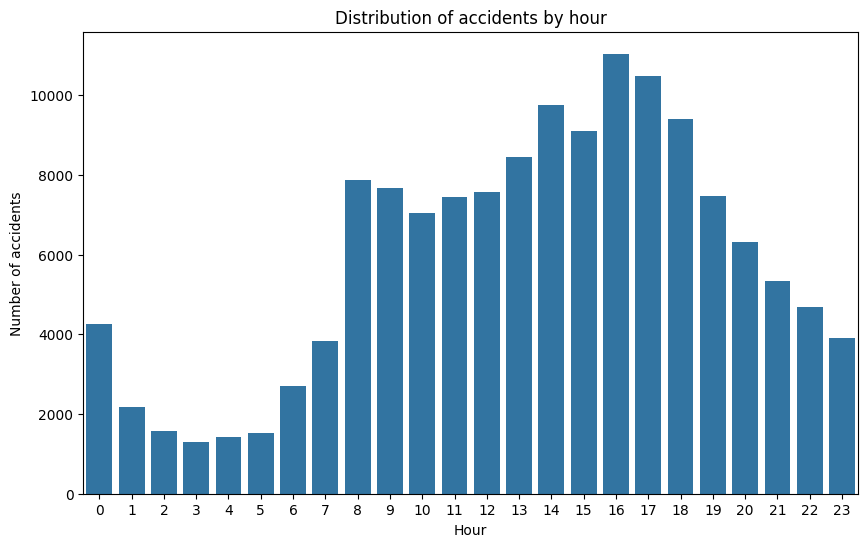

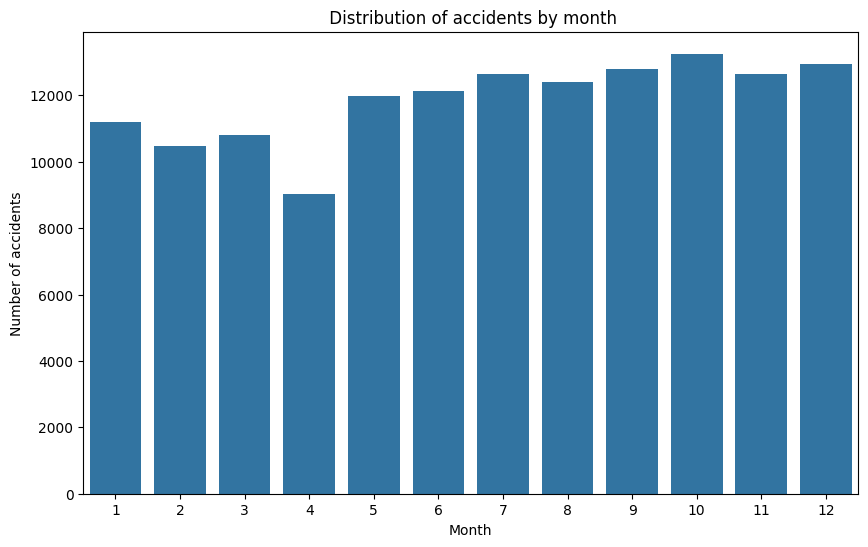

In [55]:
# Plot accident distribution by hour

plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df)
plt.title("Distribution of accidents by hour")
plt.xlabel("Hour")
plt.ylabel("Number of accidents")
plt.savefig("accidents_by_hour.png") 
plt.show()

# Plot accident distribution by month

plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df)
plt.title(" Distribution of accidents by month")
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.savefig("accidents_by_month.png")
plt.show()

Accident Location Analysis

In [56]:
# Creating a heatmap for accident locations

import folium
from folium.plugins import HeatMap

location_data = df[['latitude', 'longitude']].dropna()

center_lat = location_data['latitude'].mean()
center_lon = location_data['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

HeatMap(data=location_data.values.tolist(), radius=8).add_to(m)

m.save("heatmap_crashes.html")

m

High Accident Streets Analysis

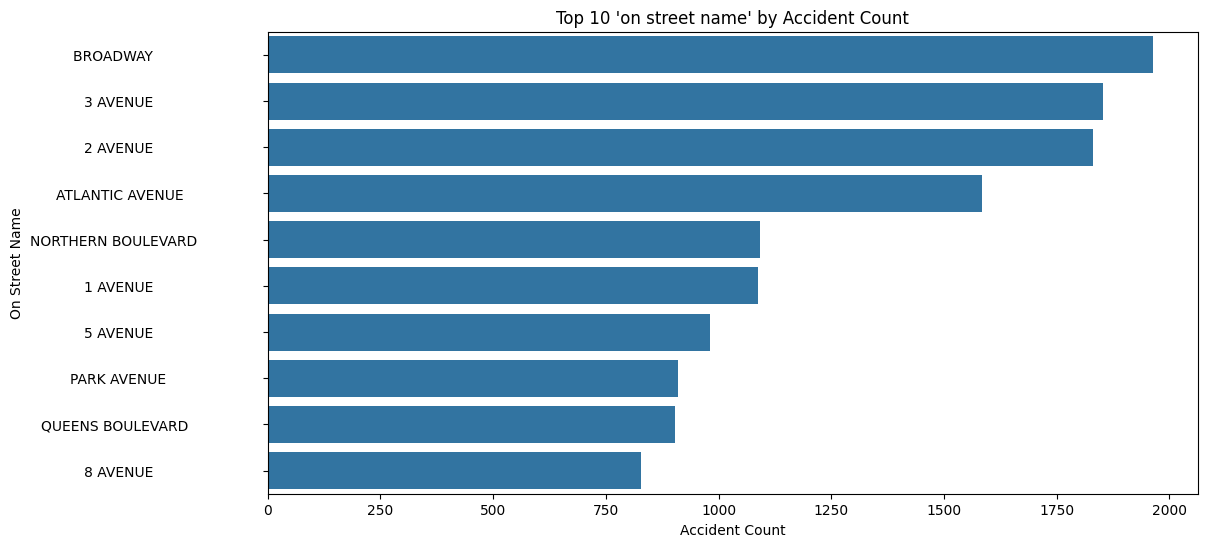

In [57]:
# Top 10 on-street names by accident count

plt.figure(figsize=(12,6))

top_on_streets = df['on street name'].value_counts().iloc[:10].index
sns.countplot(y='on street name', data=df, order=top_on_streets)
plt.title("Top 10 'on street name' by Accident Count")
plt.xlabel("Accident Count")
plt.ylabel("On Street Name")
plt.savefig("top_10_on_street_name.png")
plt.show()

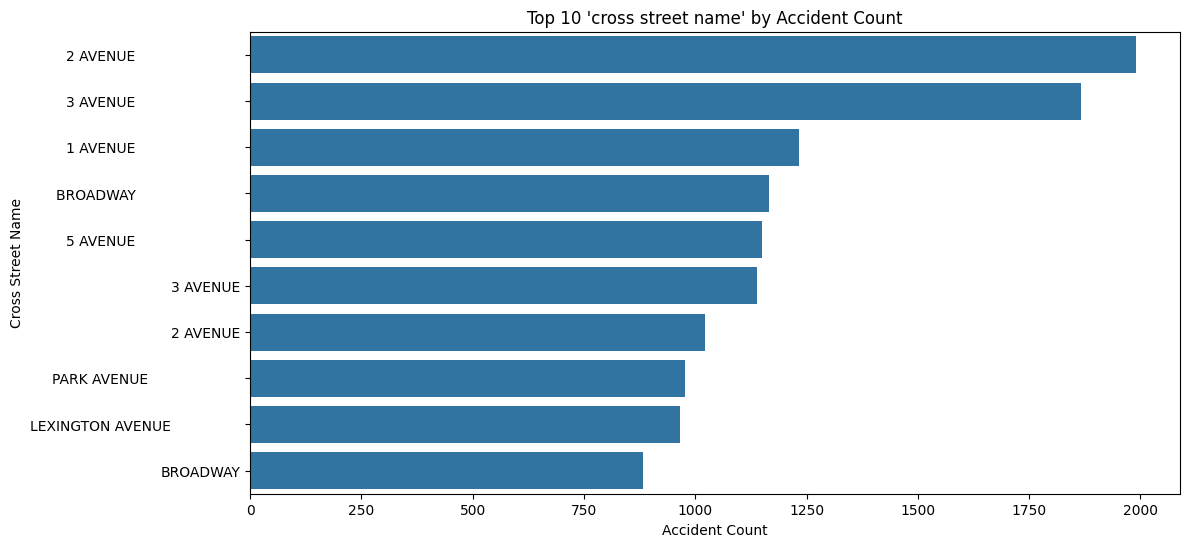

In [58]:
#Top 10 cross-street names by accident count

plt.figure(figsize=(12,6))
top_cross_streets = df['cross street name'].value_counts().iloc[:10].index
sns.countplot(y='cross street name', data=df, order=top_cross_streets)
plt.title("Top 10 'cross street name' by Accident Count")
plt.xlabel("Accident Count")
plt.ylabel("Cross Street Name")
plt.savefig("top_10_cross_streets.png")
plt.show()

Injury and Fatality Analysis

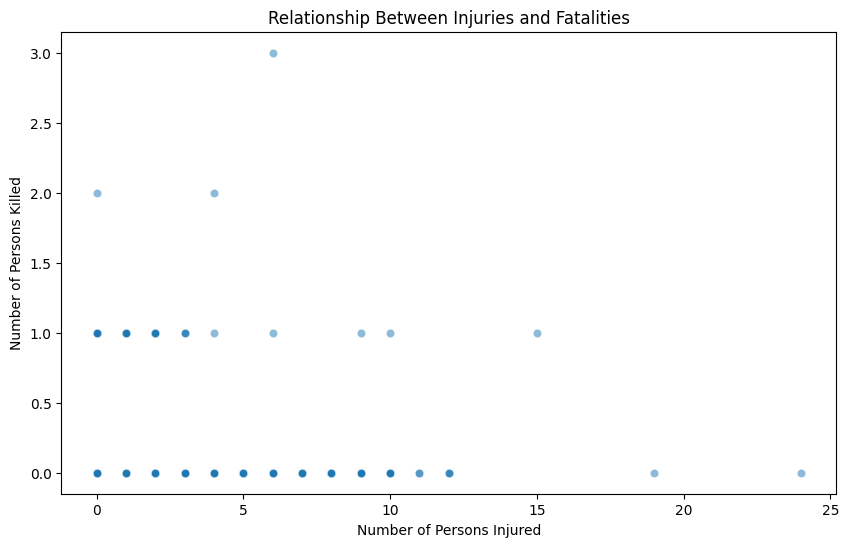

In [59]:
#Scatter plot for injuries vs fatalities

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['number of persons injured'], y=df['number of persons killed'], alpha=0.5)
plt.title("Relationship Between Injuries and Fatalities")
plt.xlabel("Number of Persons Injured")
plt.ylabel("Number of Persons Killed")
plt.savefig("injuries_vs_fatalities.png")
plt.show()

In [60]:
# Analyzing injuries and fatalities by type

columns_to_analyze = ['number of persons injured', 'number of persons killed'
                      'number of pedestrians injured', 'number of pedestrians killed', 
                      'number of cyclist injured', 'number of cyclist killed', 
                      'number of motorist injured', 'number of motorist killed']

for col in columns_to_analyze:
    if col in df.columns:
        print(f"\nDescriptive statistics for '{col}':")
        print(df[col].describe())
    else:
        print(f"\nColumn '{col}' is not present in the dataset.")


Descriptive statistics for 'number of persons injured':
count    142276.000000
mean          0.328088
std           0.764390
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: number of persons injured, dtype: float64

Column 'number of persons killednumber of pedestrians injured' is not present in the dataset.

Descriptive statistics for 'number of pedestrians killed':
count    142276.000000
mean          0.000098
std           0.009919
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: number of pedestrians killed, dtype: float64

Descriptive statistics for 'number of cyclist injured':
count    142276.000000
mean          0.045995
std           0.212143
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: number of cyclist injured, dtype: float64

Descriptive statistics for 'num

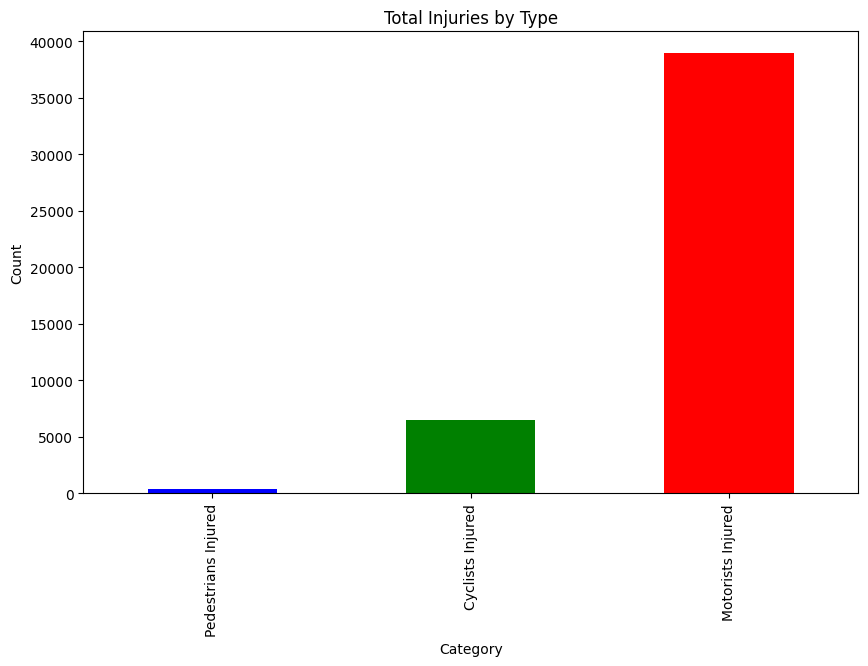

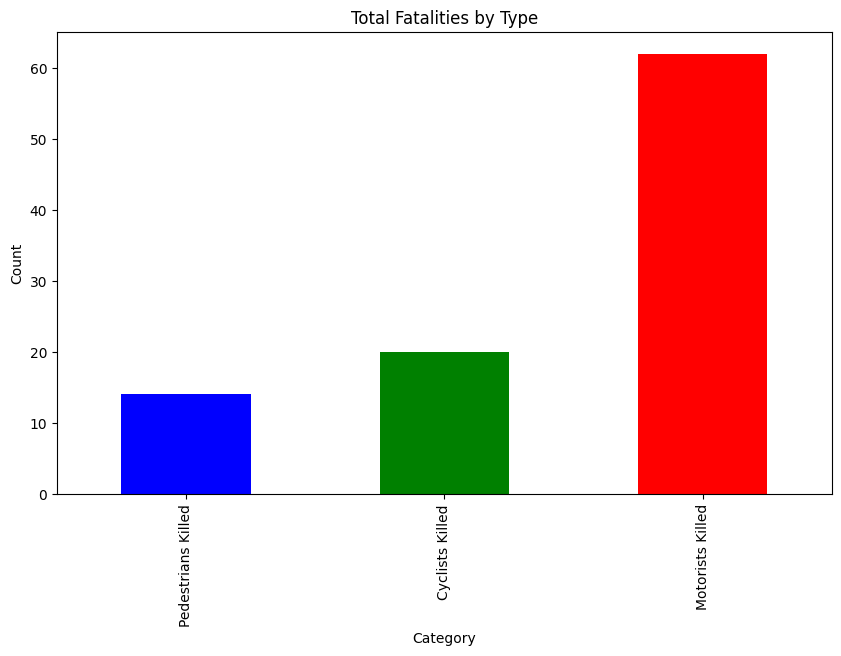

In [61]:
# Summing up injury and fatality data
injury_death_data = df[['number of pedestrians injured', 'number of pedestrians killed',
                        'number of cyclist injured', 'number of cyclist killed',
                        'number of motorist injured', 'number of motorist killed']].sum()

# Renaming columns for better visualization
injury_death_data = injury_death_data.rename(index={
    'number of pedestrians injured': 'Pedestrians Injured',
    'number of pedestrians killed': 'Pedestrians Killed',
    'number of cyclist injured': 'Cyclists Injured',
    'number of cyclist killed': 'Cyclists Killed',
    'number of motorist injured': 'Motorists Injured',
    'number of motorist killed': 'Motorists Killed'
})

# Plotting injury data
injury_death_data[['Pedestrians Injured', 'Cyclists Injured', 'Motorists Injured']].plot(kind='bar', stacked=True, figsize=(10,6), color=['blue', 'green', 'red'])
plt.title("Total Injuries by Type")
plt.ylabel("Count")
plt.xlabel("Category")
plt.savefig("total_injuries_by_type.png")
plt.show()

# Plotting fatality data
injury_death_data[['Pedestrians Killed', 'Cyclists Killed', 'Motorists Killed']].plot(kind='bar', stacked=True, figsize=(10,6), color=['blue', 'green', 'red'])
plt.title("Total Fatalities by Type")
plt.ylabel("Count")
plt.xlabel("Category")
plt.savefig("total_fatalities_by_type.png")
plt.show()


Contributing Factors Analysis

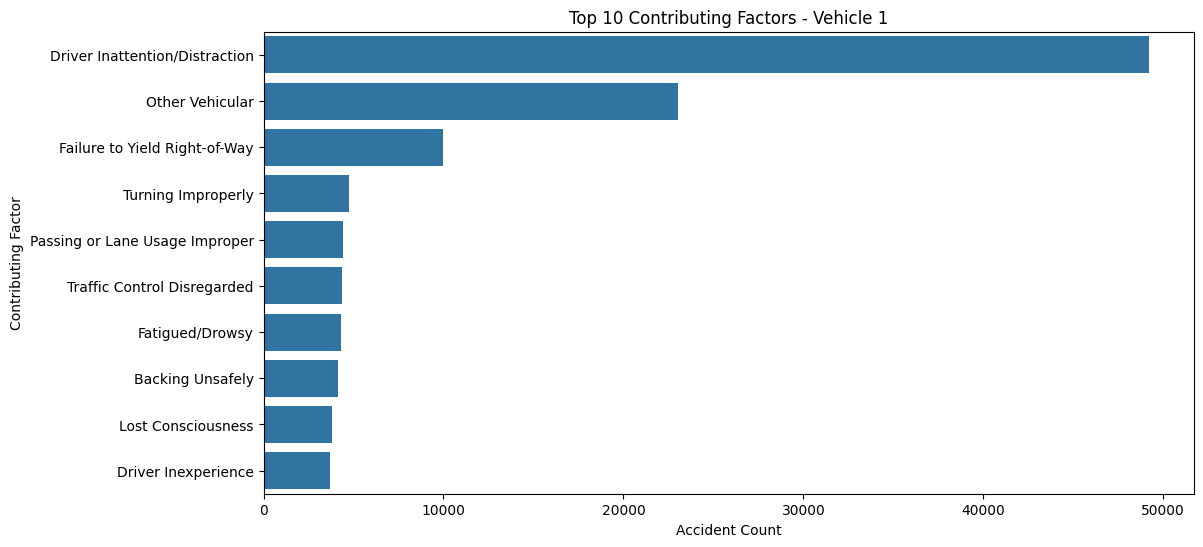

In [62]:
# Top contributing factors for vehicle 1
plt.figure(figsize=(12,6))
top_factor1 = df['contributing factor vehicle 1'].value_counts().iloc[:10].index
sns.countplot(y='contributing factor vehicle 1', data=df, order=top_factor1)
plt.title("Top 10 Contributing Factors - Vehicle 1")
plt.xlabel("Accident Count")
plt.ylabel("Contributing Factor")
plt.savefig("top_10_contributing_factors_vehicle1.png")
plt.show()

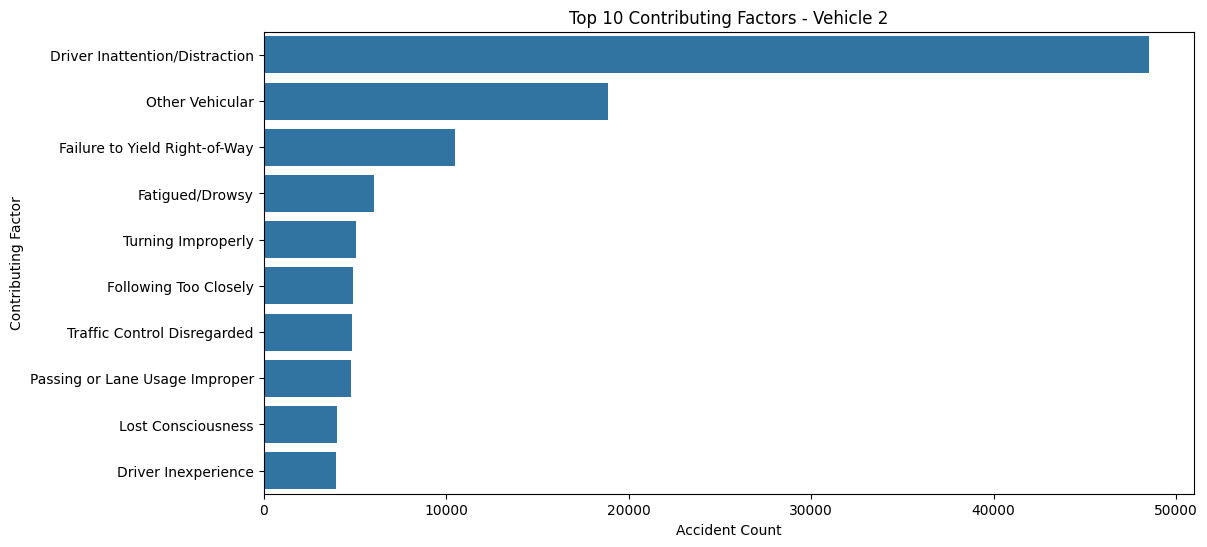

In [63]:
# Top contributing factors for vehicle 2
plt.figure(figsize=(12,6))
top_factor2 = df['contributing factor vehicle 2'].value_counts().iloc[:10].index
sns.countplot(y='contributing factor vehicle 2', data=df, order=top_factor2)
plt.title("Top 10 Contributing Factors - Vehicle 2")
plt.xlabel("Accident Count")
plt.ylabel("Contributing Factor")
plt.savefig("top_10_contributing_factors_vehicle2.png")
plt.show()

Vehicle Type and Fatality Analysis

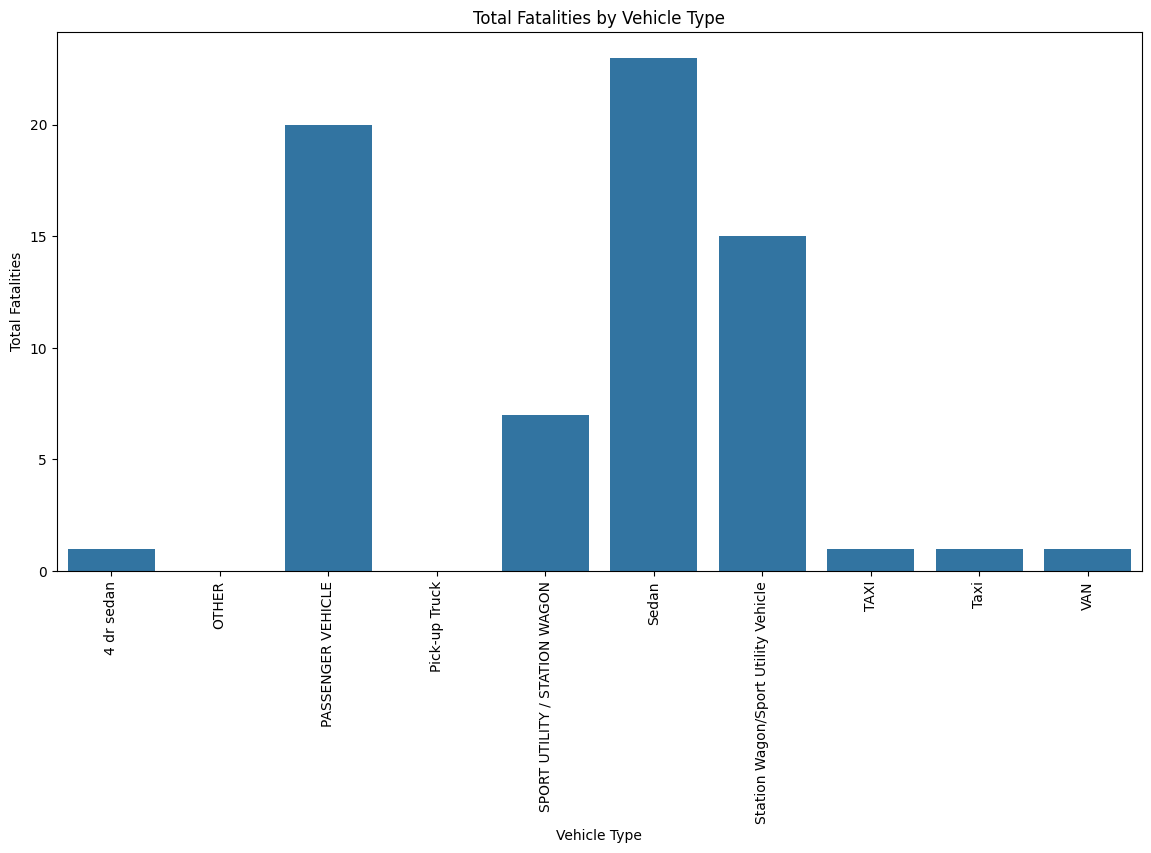

In [64]:
# Analyzing fatalities by vehicle type
top_vehicles = df['vehicle type code 1'].value_counts().iloc[:10].index
vehicle_deaths = df[df['vehicle type code 1'].isin(top_vehicles)].groupby('vehicle type code 1')['number of persons killed'].sum()

plt.figure(figsize=(14, 7))
sns.barplot(x=vehicle_deaths.index, y=vehicle_deaths.values)
plt.title("Total Fatalities by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Fatalities")
plt.savefig("total_fatalities_by_vehicle_type.png")
plt.xticks(rotation=90, fontsize=10)
plt.show()


 Vehicle Type and Injury Analysis

C:\Users\Amer\AppData\Local\Temp\ipykernel_18116\3356813026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_injuries.index, y=total_injuries.values, palette='viridis')


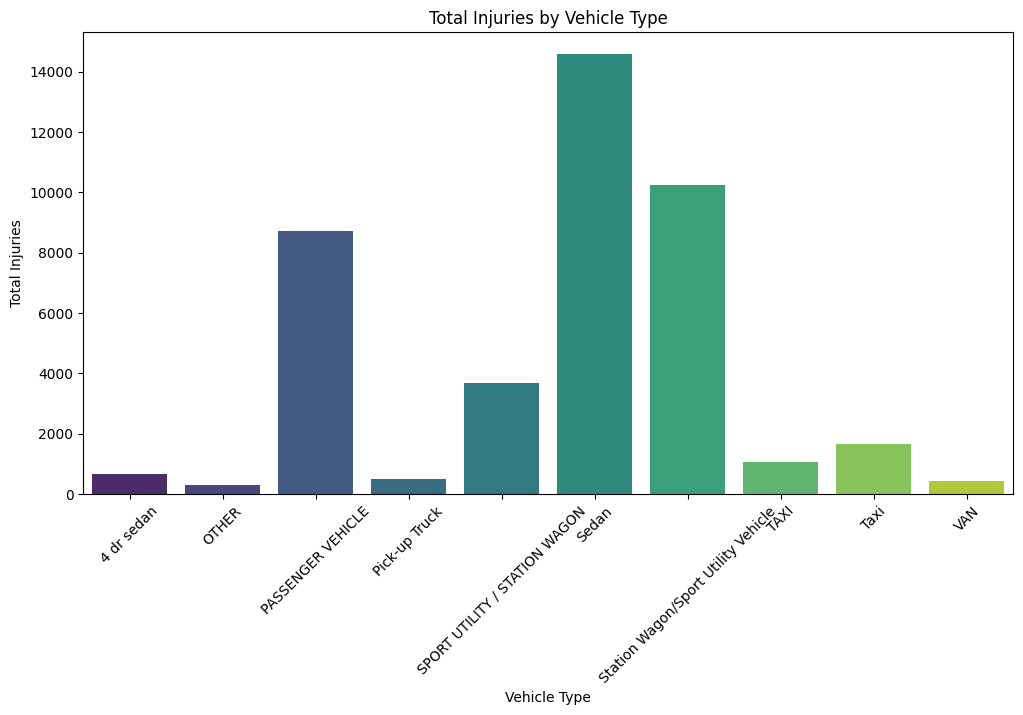

In [65]:
# Analyzing injuries by vehicle type
plt.figure(figsize=(12,6))
top_vehicles = df['vehicle type code 1'].value_counts().iloc[:10].index
total_injuries = df[df['vehicle type code 1'].isin(top_vehicles)].groupby('vehicle type code 1')['number of persons injured'].sum()
sns.barplot(x=total_injuries.index, y=total_injuries.values, palette='viridis')
plt.title('Total Injuries by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.savefig("total_injuries_by_vehicle_type.png")
plt.show()

Time Series Analysis of Accidents

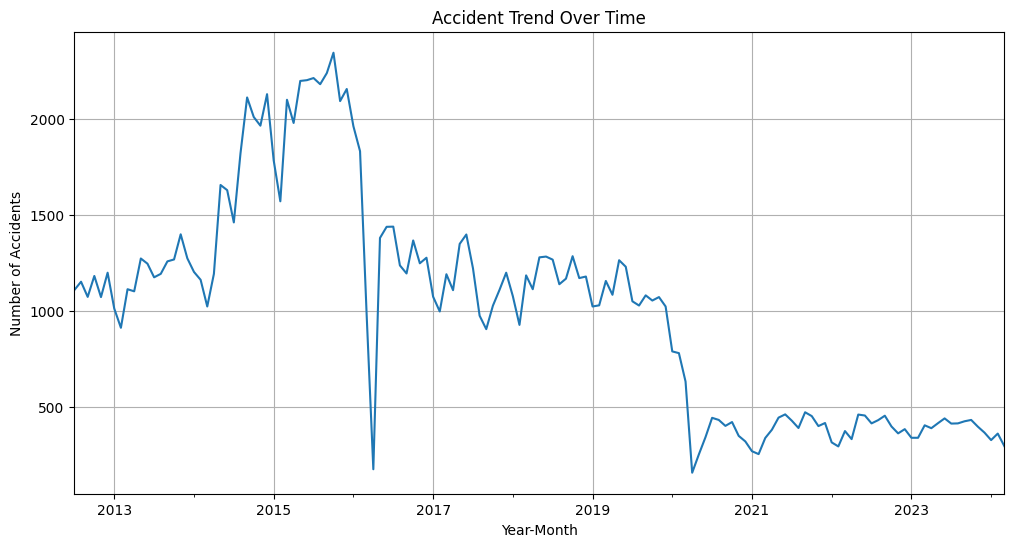

In [66]:
# Grouping data by month and year
df['YearMonth'] = df['crash date'].dt.to_period('M')
accidents_per_month = df.groupby('YearMonth').size()

plt.figure(figsize=(12,6))
accidents_per_month.plot()
plt.title('Accident Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.savefig("accident_trend_over_time.png")
plt.show()

Clustering Analysis for High-Risk Areas

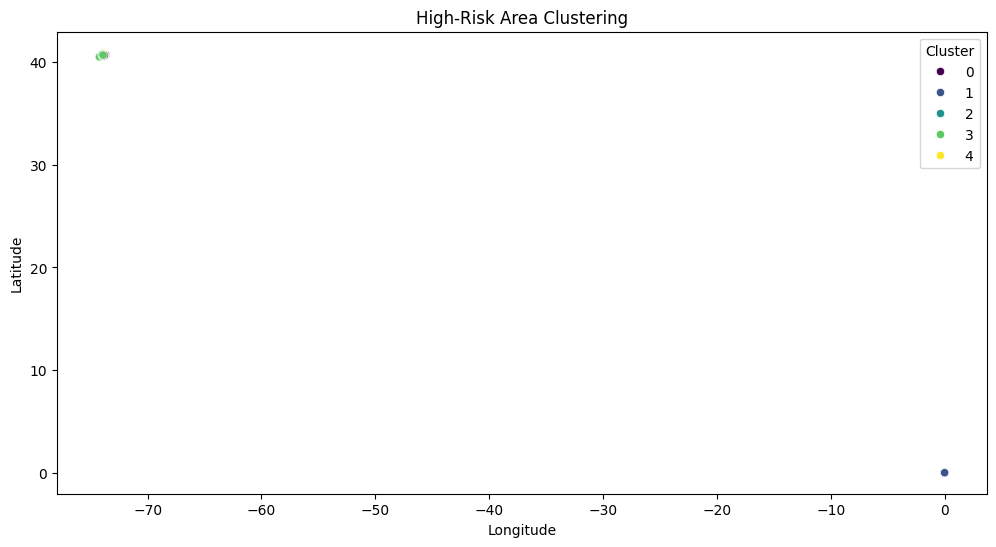

In [67]:
# Performing clustering using KMeans
def cluster_accidents(df, n_clusters=5):
    location_data = df[['latitude', 'longitude']].dropna()

    # Check if the data is not empty
    if location_data.empty:
        print("No valid location data to cluster.")
        return None, None

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    location_data['Cluster'] = kmeans.fit_predict(location_data)

    return location_data, kmeans

location_data, kmeans = cluster_accidents(df)

# Plotting clusters if data is available
if location_data is not None:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=location_data['longitude'], y=location_data['latitude'], hue=location_data['Cluster'], palette='viridis')
    plt.title('High-Risk Area Clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print("Clustering was not performed due to empty or invalid data.")


In [68]:
print(df[['latitude', 'longitude']].isna().sum())

latitude     0
longitude    0
dtype: int64


In [69]:
print(df[['latitude', 'longitude']].dropna().shape)

(142276, 2)


In [70]:
print(f"Longitude range: {df['longitude'].min()} to {df['longitude'].max()}")
print(f"Latitude range: {df['latitude'].min()} to {df['latitude'].max()}")

Longitude range: -74.2528764 to 0.0
Latitude range: 0.0 to 40.9124681


In [71]:
df = df[(df['longitude'] != 0) & (df['latitude'] != 0)]

print(f"Longitude range: {df['longitude'].min()} to {df['longitude'].max()}")
print(f"Latitude range: {df['latitude'].min()} to {df['latitude'].max()}")

Longitude range: -74.2528764 to -73.70084
Latitude range: 40.4994787 to 40.9124681


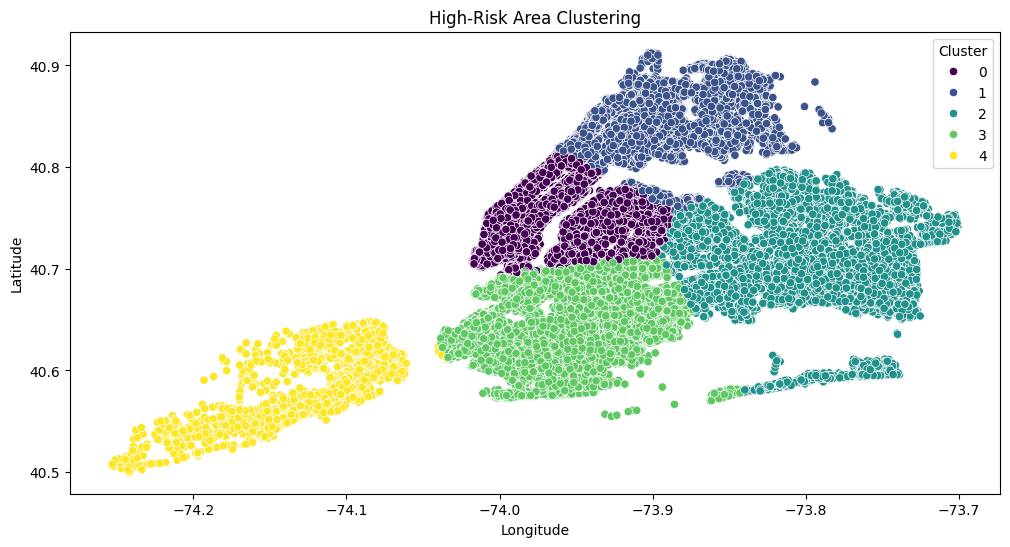

In [72]:
def cluster_accidents(df, n_clusters=5):
    location_data = df[['latitude', 'longitude']].dropna()
    
    # Filter the data to be within the valid range
    location_data = location_data[
        (location_data['latitude'] >= 40.498947) & (location_data['latitude'] <= 40.9124681) &
        (location_data['longitude'] >= -74.25496) & (location_data['longitude'] <= -73.700584)
    ]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    location_data['Cluster'] = kmeans.fit_predict(location_data)
    return location_data, kmeans

location_data, kmeans = cluster_accidents(df)

# Plotting clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x=location_data['longitude'], y=location_data['latitude'], hue=location_data['Cluster'], palette='viridis')
plt.title('High-Risk Area Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig("high_risk_area_clustering.png")
plt.show()